# Import Data From dataset



## Configuring the package import

In [6]:
import sys
sys.path.append("..")  # Add parent directory to path


In [7]:

from datasets import load_dataset, validate_dataset, show_datasets  # Now you can import the package


ds = load_dataset("./../data/categorized_v4_numeric.csv")
ds = validate_dataset(ds)

ds.head()


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


## Removing unnecessary columns

In [8]:
ds = ds.drop(columns=["country"])
# Drop columns Q1E to Q42E
# ds = ds.drop(columns=[f"Q{i}E" for i in range(1, 43) if f"Q{i}E" in ds.columns])

ds.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


# Training Model


## Splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, classification_report


# Define features (X) and multiple targets (y)
X = ds.drop(columns=["depression_score", "anxiety_score", "stress_score", "das_score"])
# Select feature columns Q1A to Q42A and target variables
# feature_columns = [f"Q{i}A" for i in range(1, 43) if f"Q{i}A" in ds.columns]
# X = ds[feature_columns]
y = ds[["depression_score", "anxiety_score", "stress_score", "das_score"]]

y = ds[["depression_score", "anxiety_score", "stress_score", "das_score"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X.head()
# y.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,TIPI9,TIPI10,education,urban,gender,age,religion,married,familysize,major_category
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,1,1,2,3,2,16,12,1,2,0
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,1,5,2,3,2,16,7,1,4,0
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,3,2,2,3,2,17,4,1,3,0
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,6,1,1,3,2,13,4,1,5,6
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,3,3,3,2,2,19,10,1,4,8


In [ ]:

# Train the model (no need for MultiOutputClassifier)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# target_names = ["depression_score", "anxiety_score", "stress_score", "das_score"]
target_names = ["depression_score", "anxiety_score", "stress_score", "das_score"]



In [ ]:
for i, target in enumerate(target_names):
    print(f"\nResults for {target}:")
    print(
        f"Mean Absolute Error: {mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])}"
    )
    print(f"R² Score: {r2_score(y_test.iloc[:, i], y_pred[:, i])}")



Results for depression_score:
Mean Absolute Error: 1.9175600251414204
R² Score: 0.9584952390749758

Results for anxiety_score:
Mean Absolute Error: 2.175928346951603
R² Score: 0.9268445313140686

Results for stress_score:
Mean Absolute Error: 2.1295549968573226
R² Score: 0.931655698263968

Results for das_score:
Mean Absolute Error: 2.0949352608422376
R² Score: 0.9773590394666374


## Graphs

### Prediction vs Actual

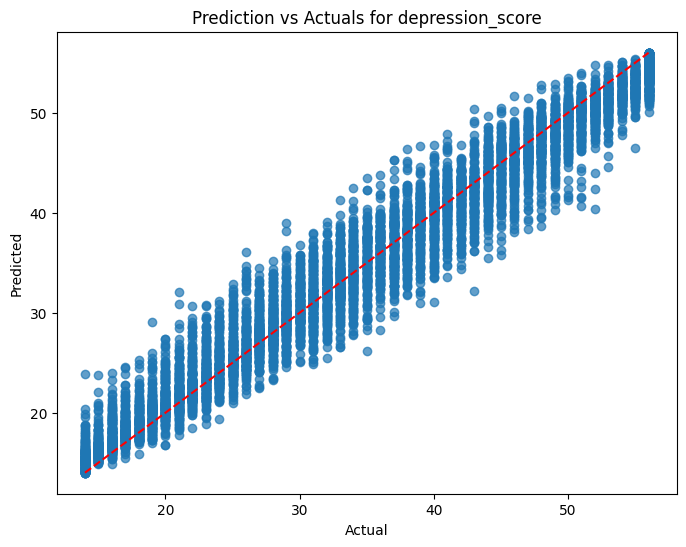

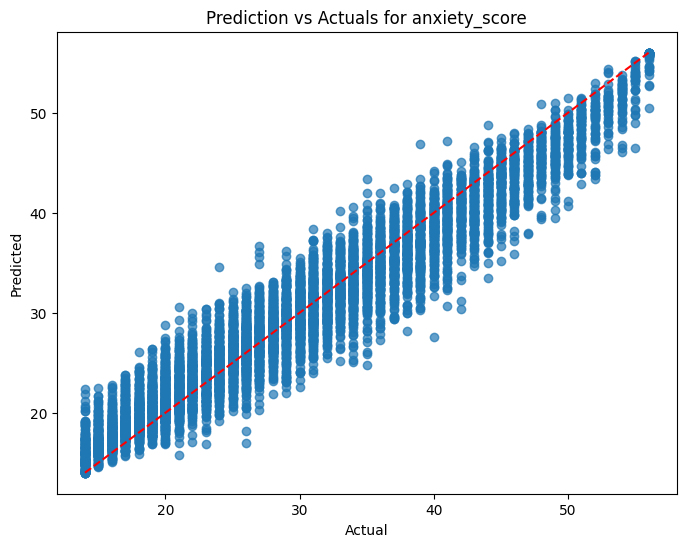

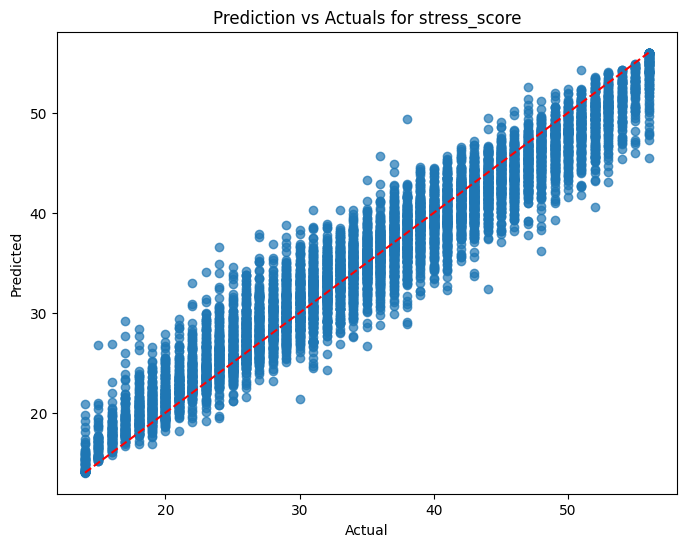

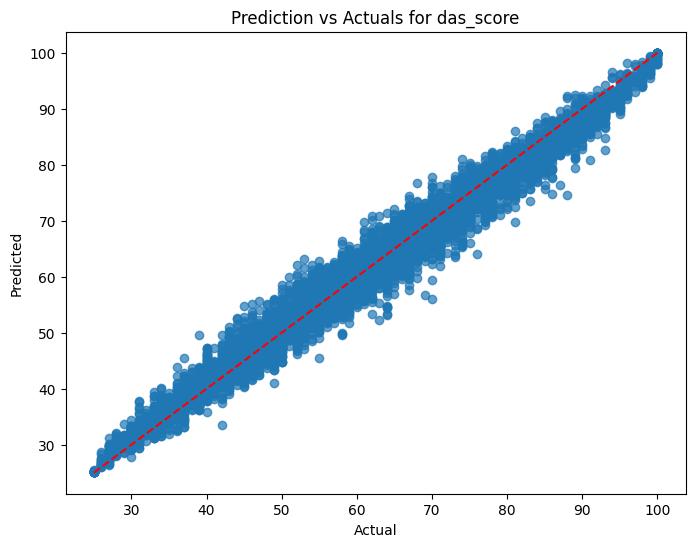

In [ ]:
import matplotlib.pyplot as plt

# Plot: Prediction vs Actual
for i, target in enumerate(target_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot(
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        color="red",
        linestyle="--",
    )  # Line of perfect prediction
    plt.title(f"Prediction vs Actuals for {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


### Residual Plot

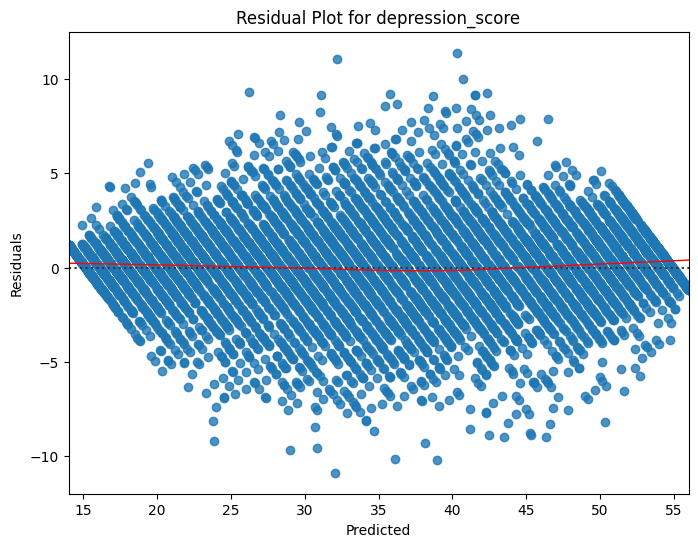

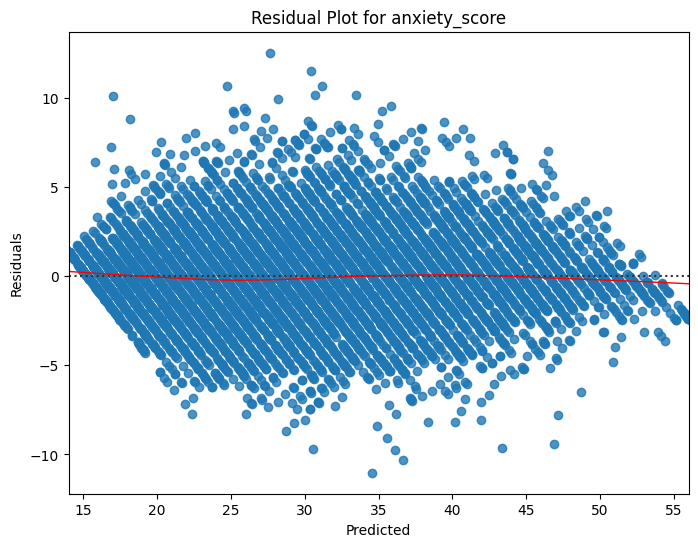

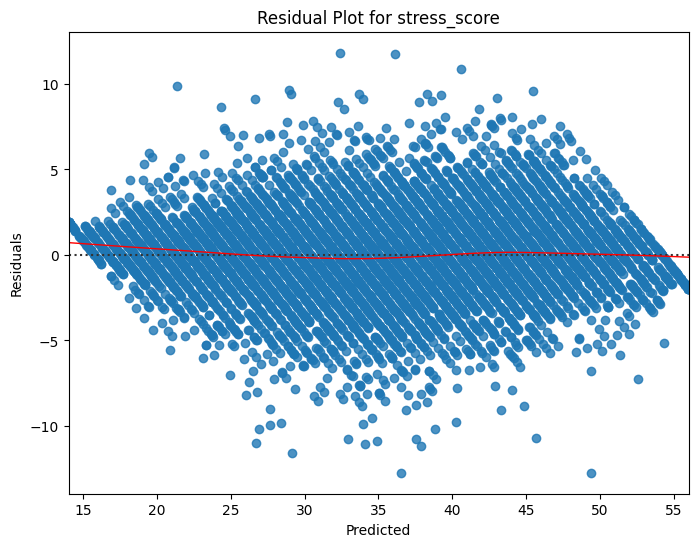

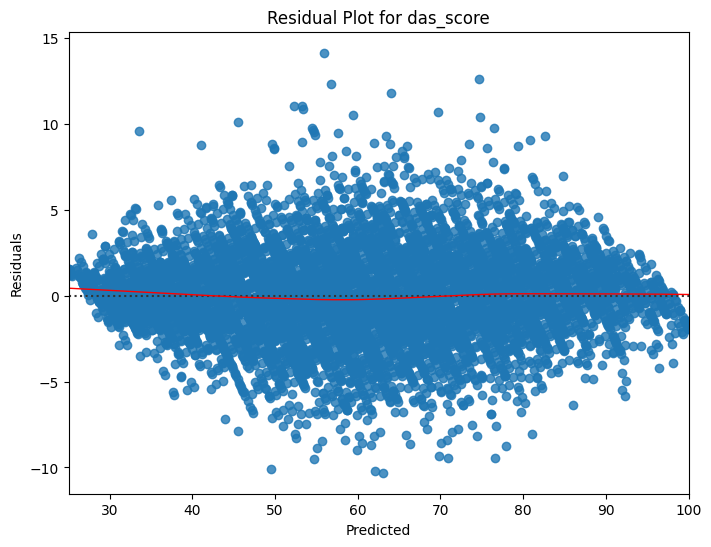

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plot
for i, target in enumerate(target_names):
    # Calculate residuals
    residuals = y_test.iloc[:, i] - y_pred[:, i]

    # Create a residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(
        x=y_pred[:, i], y=residuals, lowess=True, line_kws={"color": "red", "lw": 1}
    )
    plt.title(f"Residual Plot for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


## Saving the model

```python
import joblib

# Save the trained model
joblib.dump(multi_target_model, "models/rfv1.pkl")

# Save the feature column names used during training
joblib.dump(X.columns.tolist(), "models/rfv1_features.pkl")

print("✅ Model and features saved to the 'Models' folder.")
```